In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 11.5 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import yfinance as yf

In [4]:
sp500 = yf.Ticker("^GSPC")

In [5]:
sp500 = sp500.history(period="max")

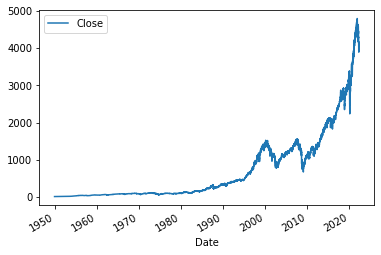

In [8]:
sp500.plot.line(y="Close",use_index=True)

In [9]:
del sp500['Dividends']

In [10]:
del sp500['Stock Splits']

In [12]:
sp500['Domani']=sp500['Close'].shift(-1)

In [16]:
sp500['Target']=(sp500['Domani'] > sp500['Close']).astype(int)

In [20]:
sp500=sp500.loc["1990-01-01":].copy()

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)

In [24]:
train = sp500.iloc[:-100]

In [26]:
test = sp500.iloc[-100:]

In [31]:
predictors = ["Close","Volume","Open","High","Low"]

In [33]:
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [34]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [36]:
import pandas as pd
preds = pd.Series(preds,index = test.index)

In [40]:
precision_score(test['Target'],preds)

0.43820224719101125